### Dataset download from Kaglle:: 
### https://www.kaggle.com/datasets/arunavakrchakraborty/financial-payment-services-fraud-data/code

Data Description
Here the description of the database has been presented.

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.....

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(sns.__version__)
print(np.__version__)
print(pd.__version__)

0.13.2
1.26.4
2.1.4


In [3]:
pd.set_option('float_format', '{:.2f}'.format)

df = pd.read_csv("Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [4]:
len(df)

6362620

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#check is there is empty values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#Check if there is duplicated values on our dataset
df.duplicated().sum()

0

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [9]:
#check how many fraud was flagged. Just to remember that flagged must be on TRANSFER transaction above 200k
fraud_alert = df.loc[(df['isFraud']==1) | (df['isFlaggedFraud']==1)]
fraud_alert = fraud_alert.groupby('type')[['isFraud','isFlaggedFraud']].sum()
fraud_alert

,isFraud,isFlaggedFraud
type,,
CASH_OUT,4116,0
TRANSFER,4097,16


In [10]:
#Check the data balance on Fraud variable
print(df.isFraud.value_counts())  
print(f"The number of fraud belongs to only {821300/6362620}% of the dataset")

isFraud
0    6354407
1       8213
Name: count, dtype: int64
The number of fraud belongs to only 0.12908204481801522% of the dataset


In [11]:
#Check the data balance on Flagged Fraud
print(df.isFlaggedFraud.value_counts())  
print(f"The number of flagged fraud belongs to only {1600/6362620}% of the dataset")

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64
The number of flagged fraud belongs to only 0.00025146873457789404% of the dataset


In [12]:
#analize flagged fraud variable on dataset
df[df['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.00,0.00,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.00,0.00,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.00,0.00,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.00,0.00,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.00,0.00,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.00,0.00,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.00,0.00,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.00,0.00,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.00,0.00,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.00,0.00,1,1


##### I was able to see that almost 63% of the transfer flagged was made in full amount. They all exceed the 200,000.00 limit in a single transaction.

In [13]:
#check how many frauds were not detected by the flagged
df_fraud_notflagged = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)]
df_fraud_notflagged.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0


In [14]:
#plot a graphic to check Type and fraud
df_fraud_notflagged["type"].value_counts()

type
CASH_OUT    4116
TRANSFER    4081
Name: count, dtype: int64

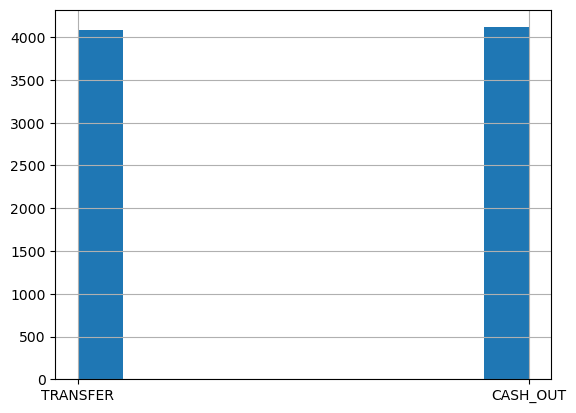

In [15]:
df_fraud_notflagged.type.hist();

In [16]:
df_fraud_notflagged.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8197.00,8197.00,8197.00,8197.00,8197.00,8197.00,8197.00,8197.00
mean,368.08,1461343.16,1637627.69,177508.21,545311.96,1282205.52,1.00,0.00
std,216.33,2397046.56,3528099.52,1915377.85,3339589.25,3912220.65,0.00,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,181.00,126848.63,125464.42,0.00,0.00,0.00,1.00,0.00
50%,367.00,438983.45,438224.60,0.00,0.00,7466.12,1.00,0.00
75%,558.00,1504870.33,1504870.33,0.00,148038.26,1062664.96,1.00,0.00
max,743.00,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66,1.00,0.00


##### On the 'df_fraud_notflagged' dataset with 8197 Fraud, half was made by CASH_OUT and the other half by TRANSFER. More than 50% of the amount exceed the 200.000 limit and was not detected by the fraud flagged.

In [17]:
#create a column to identify the amoung more and less than 200k that was supposed to be detected by the flagged.
df_fraud_notflagged['MoreLess200'] = np.where((df_fraud_notflagged['amount'] >= 200000) & (df_fraud_notflagged['type'] == 'TRANSFER'), 1, 0)
df_fraud_notflagged.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,MoreLess200
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0,0


In [18]:
df_fraud_notflagged.MoreLess200.value_counts()

MoreLess200
0    5473
1    2724
Name: count, dtype: int64

In [19]:
len(df_fraud_notflagged)

8197

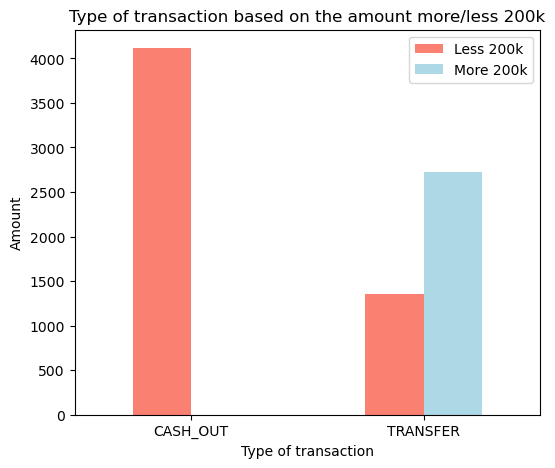

In [20]:
pd.crosstab(df_fraud_notflagged.type, df_fraud_notflagged.MoreLess200).plot(kind="bar",
                                                                          figsize=(6, 5),
                                                                          color=["salmon", "lightblue"])

plt.title("Type of transaction based on the amount more/less 200k")
plt.xlabel("Type of transaction")
plt.ylabel("Amount")
plt.legend(["Less 200k", "More 200k"])
plt.xticks(rotation=0);

##### We noticed that there were 2724 TRANSFER transaction over 200k that was not flagged. This correspond over 33% of the fraud transactions.

In [21]:
df_fraud_notflagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,MoreLess200
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1


In [22]:
#The number of fraud transactions by hour
transaction_by_hour = df.groupby(['step'])[['amount','isFraud','isFlaggedFraud']].sum()
fraud_by_hour = transaction_by_hour.loc[(transaction_by_hour['isFraud'] > 0)|(transaction_by_hour['isFlaggedFraud'] > 0)]
fraud_by_hour 

,amount,isFraud,isFlaggedFraud
step,,,
1,285429181.15,16,0
2,85921604.02,8,0
3,43293884.42,4,0
4,72910028.57,10,0
5,45548089.75,6,0
...,...,...,...
739,16587831.36,10,0
740,7632963.58,6,0
741,87828992.99,22,1


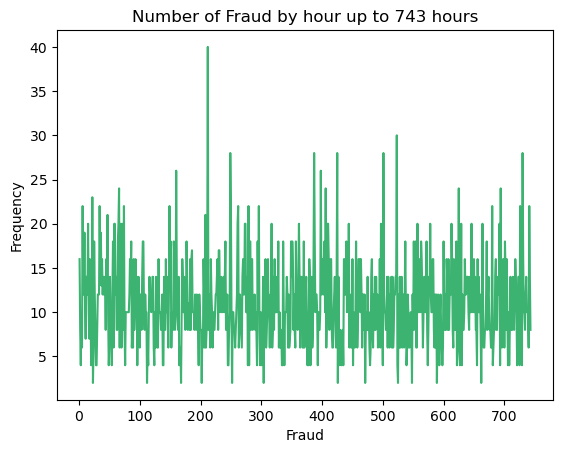

In [23]:
fraud_by_hour['isFraud'].plot(color=["mediumseagreen"])

plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.title('Number of Fraud by hour up to 743 hours');

### Data Processing

In [24]:
#original dataframe
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [25]:
# let's create a copy of the original dataset so we don't have to manipulate the original
df_temp = df.copy()
df_temp

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [26]:
#we are going to create a moreless200k column on our original 
df_temp['isFlaggedFraud200k'] = np.where((df_temp['amount'] <= 200000) & (df_temp['type']=='TRANSFER'),1,0)
df_temp.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud200k
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0


In [27]:
# Drop columns nameOrig NameDest
df_temp.drop(columns=['nameOrig', 'nameDest'], inplace=True)

# Tranform column type into numerical
df_temp = pd.get_dummies(df_temp, prefix='type').astype(int)

In [28]:
df_temp.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud200k,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6362615,743,339682,339682,0,0,339682,1,0,0,0,1,0,0,0
6362616,743,6311409,6311409,0,0,0,1,0,0,0,0,0,0,1
6362617,743,6311409,6311409,0,68488,6379898,1,0,0,0,1,0,0,0
6362618,743,850002,850002,0,0,0,1,0,0,0,0,0,0,1
6362619,743,850002,850002,0,6510099,7360101,1,0,0,0,1,0,0,0


##### Check the columns correlation 

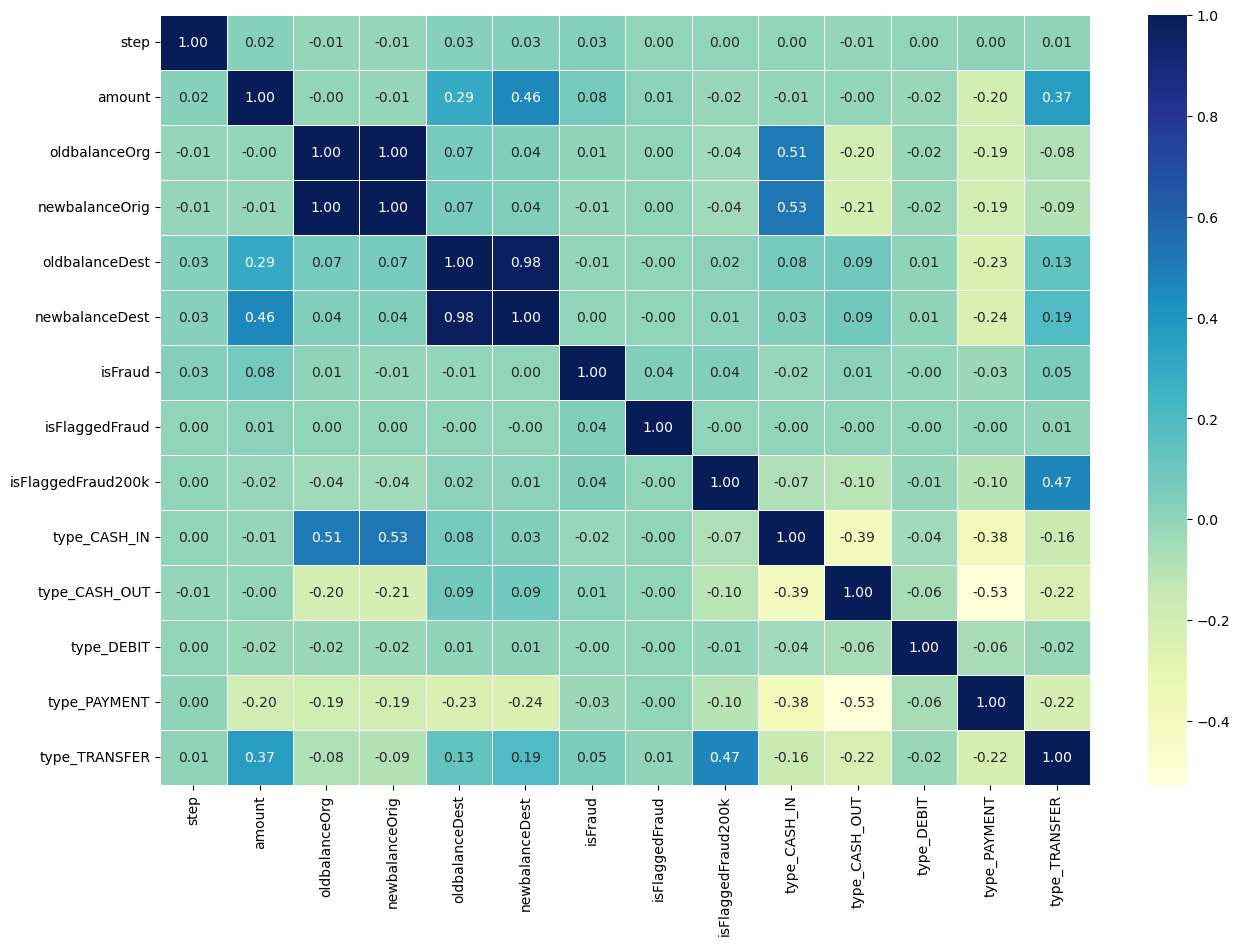

In [29]:
corr_matrix = df_temp.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

##### We can see that many of those columns don't have any correlation. However, we are not going to make any changes yet.
##### Now we have our dataset all numerical and ready to be split for training and test

### Split data without reduce it

In [30]:
#create a train and test dataset
from sklearn.model_selection import train_test_split

X = df_temp.drop('isFraud', axis=1)
y = df_temp['isFraud']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state= 42)

### Modeling

In [31]:
#put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [32]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
'''
%%time 
model_scores = fit_and_score(models=models,
                             X_train=Xtrain,
                             X_test=Xtest,
                             y_train=ytrain,
                             y_test=ytest)

model_scores
'''

CPU times: total: 30min 23s
Wall time: 28min 3s


{'Logistic Regression': 0.9983251134490718,
 'KNN': 0.9994310519880175,
 'Random Forest': 0.9997008569844917}

##### For umbalace dataset, we achieve greats results since less than 1% of the data is fraud. Our Machine Learning overfit based on noFraud category

CPU times: total: 30min 31s
Wall time: 28min 24s
{'Logistic Regression': 0.9983251134490718,
 'KNN': 0.9994310519880175,
 'Random Forest': 0.9997008569844917}

### Reduce and Split data

In [34]:
#reduce dataset to make training faste
print(df.isFraud.value_counts())
print("\n")
#Separate data isFraud == 0
data_noFraud = df_temp[df_temp["isFraud"]==0]
data_isFraud = df_temp[df_temp["isFraud"]==1]

###reduce data isFraud == 0
#First shuffle the data 
shuffled_df = data_noFraud.sample(frac=1).reset_index(drop=True)
#reduce the data
shuffled_reduce_df = shuffled_df.iloc[:10000,:]
print(shuffled_reduce_df.isFraud.value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


isFraud
0    10000
Name: count, dtype: int64


In [35]:
shuffled_reduce_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud200k,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,138,207133,477,207610,285898,78765,0,0,0,1,0,0,0,0
1,158,4986,0,0,119740,124727,0,0,1,0,0,0,0,1
2,205,68639,104351,35711,2607559,2676198,0,0,0,0,1,0,0,0
3,281,130597,15243,145840,0,0,0,0,0,1,0,0,0,0
4,393,15108,325133,310024,0,0,0,0,0,0,0,0,1,0


In [36]:
#we can check if the no Froud data is balanced before merge and then proceed with Machine Learning
check_balance_df = shuffled_reduce_df.groupby(['isFraud'])[['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']].sum()
check_balance_df

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,
0,2239,3520,63,3398,780


In [37]:
check_balance_df.T

isFraud,0
type_CASH_IN,2239
type_CASH_OUT,3520
type_DEBIT,63
type_PAYMENT,3398
type_TRANSFER,780


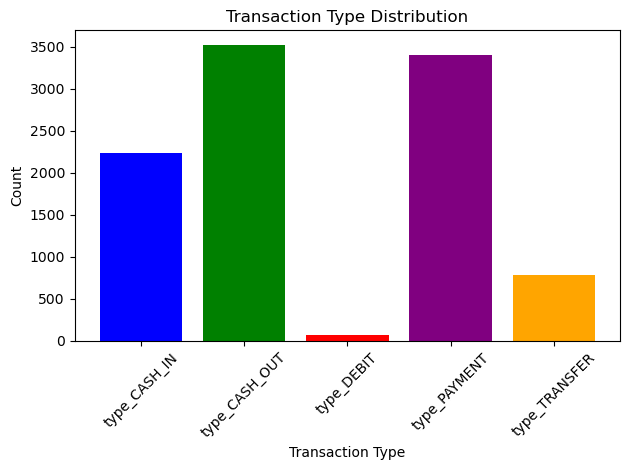

In [38]:
# Data
categories = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
counts = [2239, 3520, 63, 3398, 780]

# Create bar plot
plt.bar(categories, counts, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type Distribution')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


##### Now that we have a balanced data, we are going to merge 

In [39]:
#len of the data Fraud
len(data_isFraud)

8213

In [40]:
#len of the data no fraud after reduce it
len(shuffled_reduce_df)

10000

In [41]:
# We are merging the reduced non fraud data with the isFraud data 
balanced_df = pd.merge(data_isFraud, shuffled_reduce_df,how='outer')

# we also shuffled our data for better experience
balanced_df = balanced_df.sample(frac=1, random_state=42)

### Split our balanced data into Train, Test, and normalize data

In [42]:
#copy the dataframe so we can manipulate
balanced_df_copy = balanced_df.copy()
balanced_df_copy

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud200k,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
15417,207,13376,237010,223634,0,0,0,0,0,0,0,0,1,0
11816,235,84143,19961,0,309489,393633,0,0,0,0,1,0,0,0
9400,93,7595,263655,256059,0,0,0,0,0,0,0,0,1,0
8425,714,175744,354,176098,147196,0,0,0,0,1,0,0,0,0
1989,176,102229,102229,0,0,102229,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,206,82249,27689,109938,5141,0,0,0,0,1,0,0,0,0
11964,379,138454,0,0,3043406,3461818,0,0,0,0,1,0,0,0
5390,484,156220,156220,0,0,156220,1,0,0,0,1,0,0,0
860,71,1871553,1871553,0,0,0,1,0,0,0,0,0,0,1


In [43]:
#Splitting data into train and test

X = balanced_df_copy.drop('isFraud', axis=1)
y = balanced_df_copy['isFraud']

# normalize X data
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler(feature_range = (0,1)) 
rescalerX = normalize.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(rescalerX, y, test_size = 0.3, random_state=42)

In [44]:
#verifying the shape of the Train Test dataset
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

((12749, 13), (5464, 13), (12749,), (5464,))

In [45]:
#check again is the data is balanced
ytrain.value_counts(),ytest.value_counts()

(isFraud
 0    7022
 1    5727
 Name: count, dtype: int64,
 isFraud
 0    2978
 1    2486
 Name: count, dtype: int64)

In [46]:
# let's call the fit and score function again
model_scores = fit_and_score(models=models,
                             X_train=Xtrain,
                             X_test=Xtest,
                             y_train=ytrain,
                             y_test=ytest)

model_scores

{'Logistic Regression': 0.8351024890190337,
 'KNN': 0.9401537335285505,
 'Random Forest': 0.991398243045388}

In [47]:
#Since Random Forest has the best score, lets use it as our model
RandomForestModel = RandomForestClassifier()

In [48]:
#train the training dataset
RandomForestModel.fit(Xtrain,ytrain)

RandomForestClassifier()

In [49]:
#predict the test data set
RandomForestScore = RandomForestModel.predict(Xtest)
RandomForestScore

array([0, 0, 1, ..., 0, 1, 1])

In [50]:
#real anwser
ytest

14894    0
10472    0
1569     1
15470    0
3433     1
        ..
9845     0
9258     0
16977    0
3648     1
6768     1
Name: isFraud, Length: 5464, dtype: int32

### Evaluation Metrics

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [52]:
#confuse matrix
print(confusion_matrix(ytest,RandomForestScore))

[[2947   31]
 [  15 2471]]


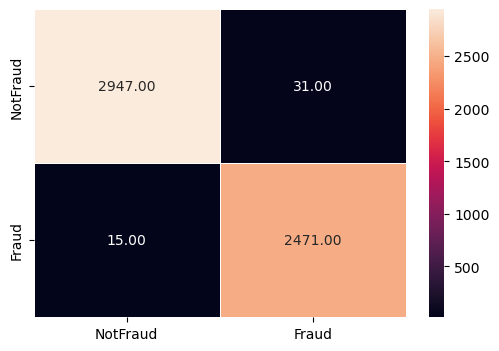

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(confusion_matrix(ytest,RandomForestScore),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 xticklabels=['NotFraud','Fraud'],
                 yticklabels=['NotFraud','Fraud']);

##### Based on the Confuse Matrix above, we have 14 False Positive and 34 False Negative

In [54]:
print(classification_report(ytest,RandomForestScore))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2978
           1       0.99      0.99      0.99      2486

    accuracy                           0.99      5464
   macro avg       0.99      0.99      0.99      5464
weighted avg       0.99      0.99      0.99      5464



In [55]:
print(f"Precision: ",accuracy_score(ytest,RandomForestScore))
print(f"Precision: ",precision_score(ytest,RandomForestScore))
print(f"Recall: ",recall_score(ytest,RandomForestScore))
print(f"F1 Score: ",f1_score(ytest,RandomForestScore))

Precision:  0.9915812591508053
Precision:  0.9876099120703438
Recall:  0.9939662107803701
F1 Score:  0.9907778668805133


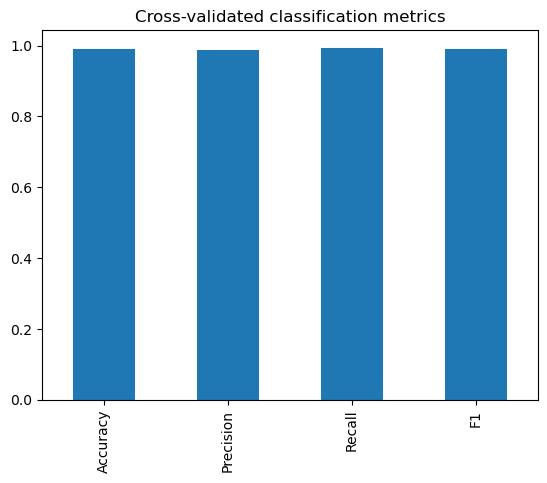

In [56]:
cv_metrics = pd.DataFrame({"Accuracy": accuracy_score(ytest,RandomForestScore),
                           "Precision": precision_score(ytest,RandomForestScore),
                           "Recall": recall_score(ytest,RandomForestScore),
                           "F1": f1_score(ytest,RandomForestScore)},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [57]:
RandomForestModel.feature_importances_

array([8.51931895e-02, 1.60959529e-01, 2.70856284e-01, 1.16703617e-01,
       5.26922719e-02, 6.16944933e-02, 1.50542839e-04, 2.93060688e-02,
       3.82276791e-02, 3.95989166e-02, 3.10443518e-04, 5.25585901e-02,
       9.17483742e-02])

In [58]:
feature_dict = dict(zip(balanced_df_copy.columns, list(RandomForestModel.feature_importances_)))
feature_dict

{'step': 0.08519318945298823,
 'amount': 0.16095952939478556,
 'oldbalanceOrg': 0.27085628369146914,
 'newbalanceOrig': 0.11670361717448376,
 'oldbalanceDest': 0.05269227185264213,
 'newbalanceDest': 0.06169449327507092,
 'isFraud': 0.00015054283906145284,
 'isFlaggedFraud': 0.029306068773356373,
 'isFlaggedFraud200k': 0.03822767914649546,
 'type_CASH_IN': 0.039598916612326,
 'type_CASH_OUT': 0.000310443518178612,
 'type_DEBIT': 0.05255859011414897,
 'type_PAYMENT': 0.09174837415499326}

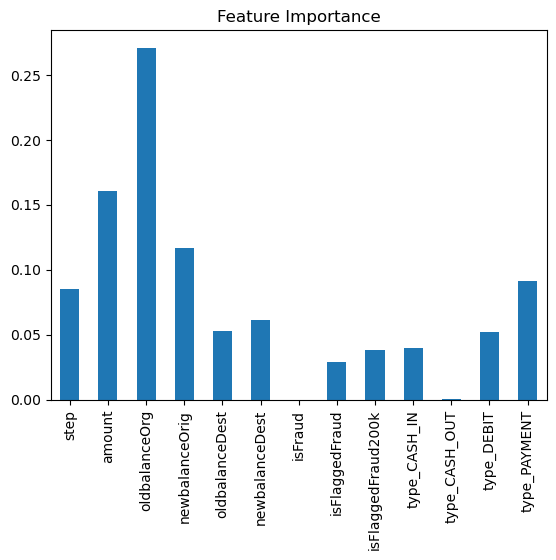

In [59]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);